In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pypianoroll
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [3]:
from music_generator.models import DivideAndCompose
from music_generator.midi import play_pianoroll, plot_pianoroll

2021-11-24 16:58:11.109264: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-24 16:58:11.109284: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
files = glob.glob('../**/*.npz', recursive=True)

In [5]:
multitracks = [pypianoroll.load(fp) for fp in files[0:10]]

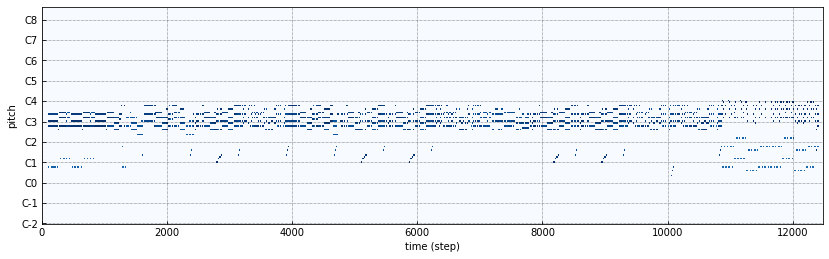

In [6]:
model = DivideAndCompose(multitracks[0], 'Piano')

In [7]:
model.init_model(quarter_notes_window=4)
model.fit(epochs=200)

2021-11-24 16:58:13.689767: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-24 16:58:13.690050: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-24 16:58:13.690101: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-11-24 16:58:13.690148: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-11-24 16:58:13.690194: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 96, 512)           328192    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 96, 512)           524800    
                                                                 
 dense (Dense)               (None, 96, 512)           262656    
                                                                 
 dense_1 (Dense)             (None, 96, 256)           131328    
                                                                 
 dense_2 (Dense)             (None, 96, 128)           32896     
                                                                 
Total params: 1,279,872
Trainable params: 1,279,872
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
4/4 [=============================

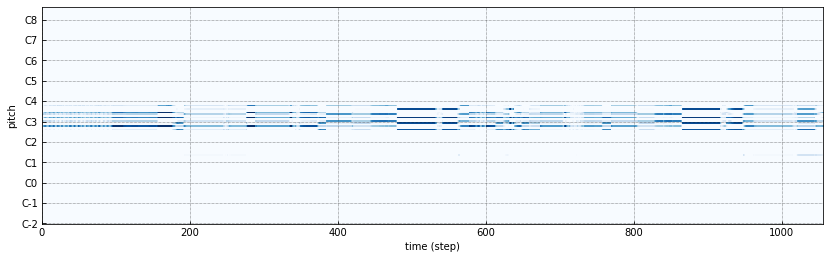

In [8]:
song = model.createSong(10)
model.plot(song)

In [9]:
model.play(song)

In [10]:
song.to_pretty_midi().write('/tmp/song.midi')